# Lecture 3

## Previous lectures

- Metric spaces, complete metric spaces
- Vector spaces, Banach, Euclidean, Hilbert spaces,  contraction principle, Cauchy-Bunyakovski inequality

## Todays lecture
- (end of) Orthogonal basis
- Linear operators
- Linear functionals, Reisz, Banach-Steinhaus, Hanh-Banach theorems

## Orthogonal basis

A set $x_1, x_2, \ldots, $ forms an orthonormal system, 

if $$(x_i, x_j) = \delta_{ij}, \quad i, j = 1, \ldots$$

Q: Any examples of orthogonal bases?

## Examples of orthogonal bases

1. Columns of orthogonal matrices in $\mathbb{R}^n$ (i.e. $U^{\top} U = I$.)
2. Set of trigonometric functions $1, \cos nt, \sin nt$ forms an orthogonal system in $L_2(0, 2 \pi)$
3. Orthogonal polynomials, which can be obtained by the **orthogonalization process**

## Linear independence

**Theorem** If $\{ x_i \}$ form an orthonormal system then this system is linearly independent.

**Proof:** Suppose there exist numbers $\lambda_1, \ldots, \lambda_k$ such that

$$\sum_{s=1}^M \lambda_s x_{n_s} = 0.$$

Then we take scalar product with $x_{n_s'}$ and get $\lambda_{s'} = 0$.

## Gram-Schmidt-Sonin orthogonalization
The "inverse" is also true: any set of linearly independent elements from a Hilbert space $H$ can be orthogonalized.


## Construction of orthonormal basis

Take $e_1 = \frac{x_1}{\Vert x_1 \Vert}$, and then $e'_2 = x_2 - \alpha e_1$ and select $\alpha$ in such a way that 

$$(e_2, e_1) = 0.$$

This uniquely defines $\alpha = (x_2, e_1)$, and $\Vert e'_2 \Vert  > 0$ otherwise $x_1, x_2$ will be linearly dependent, 
and we can set $e_2 = \frac{e'_2}{\Vert e'_2 \Vert}$.

This process then continues:  $e'_3 = x_3 - \alpha_1 e_1 - \alpha_2 e_2$ and we need $(e'_3, e_1) = (e'_3, e_2) = 0$ which uniquely defines $\alpha_1, \alpha_2$

## Interesting applications

1. Orthogonalization in matrix analysis (stability issues!)
2. Orthogonal polynomial basis -- never use monomials for polynomial approximation!

## Example of polynomial expansions

Take a function $f(x)$ and try to:

$$ f(x) \approx \sum_{k=1}^N \alpha_k x^k$$ 

or 

$$ f(x) \approx \sum_{k=1}^N \alpha_k T_k(x), $$

where $T_k(x)$ are **Chebyshev polynomials** (each is of $k$-th degree).

[  7.16728532e-93   9.91977696e-94  -3.25742286e-92  -1.44428652e-91
  -4.41635076e-91  -1.07787782e-90  -1.99453642e-90  -1.55724511e-90
   8.83780398e-90   6.32095035e-89   2.78872566e-88   1.02138188e-87
   3.33926218e-87   9.97883063e-87   2.73218722e-86   6.73891781e-86
   1.41532190e-85   2.04355323e-85  -1.21075767e-85  -2.65304241e-84
  -1.46867367e-83  -6.26575791e-83  -2.35734414e-82  -8.18188387e-82
  -2.66919507e-81  -8.25203811e-81  -2.42030879e-80  -6.70122611e-80
  -1.72726397e-79  -4.00919123e-79  -7.65656910e-79  -7.78230937e-79
   2.67389075e-78   2.37966201e-77   1.19064611e-76   4.94958593e-76
   1.86271863e-75   6.56195475e-75   2.19636539e-74   7.03878252e-74
   2.16580518e-73   6.39108052e-73   1.80057769e-72   4.79379237e-72
   1.17952847e-71   2.54543995e-71   4.09533496e-71   1.99521559e-72
  -3.87685166e-70  -2.40060112e-69  -1.09459955e-68  -4.37233018e-68
  -1.61352858e-67  -5.63166503e-67  -1.88004233e-66  -6.03366852e-66
  -1.86628530e-65  -5.55531236e-65

/home/ivan/miniconda2/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


/home/ivan/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Humor Sans', u'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


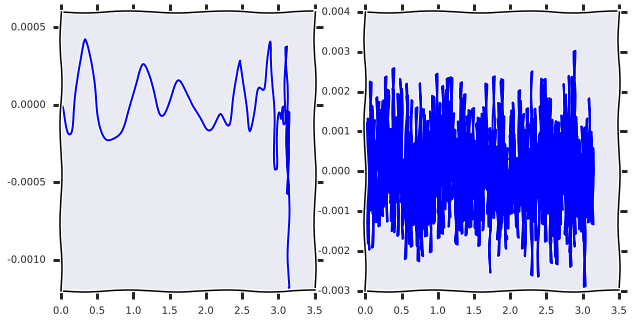

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
sns.despine()
%matplotlib inline
n = 1000
f = lambda x: np.cos(x)
x = np.linspace(0, np.pi, n)
y = f(x)
yobs = y + 1e-3*np.random.randn(n)
coef = np.polyfit(x, yobs, deg=200)
print(coef)
ypol = np.polyval(coef, x)
#plt.plot(x, y)
plt.xkcd()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x, ypol - y)
ax[1].plot(x, yobs - y)

## Linear operators in Banach spaces

## Definition

Let $X$ and $Y$ be two Banach spaces, and $A$ is a mapping from a subset $D(A) \subset X$ to a subset $R(A)$ of $Y$.

- $D(A)$ is called domain of definition of $A$
- $R(A)$ is called range of values of $A$

Operator $A$ from $X$ and $Y$ is called **linear operator** if 

$$A( \lambda_1 x_1 + \lambda_2 x_2) = \lambda_1 A(x_1) + \lambda_2 A(x_2)$$ 

for any $x_1, x_2 \in D(A)$.

## Theorem

Domain of definition $D(A)$ of a linear operator is a linear space.

Indeed, let $A x_1 = y_1, A x_2 = y_2$, from the definition; $ A(\lambda_1 x_1 + \lambda_2 x_2) = \lambda_1 y_1 + \lambda_2 y_2$, thus $\lambda_1 x_1 + \lambda_2 x_2 \in D(A)$.

Typically, either $D(A) = X$, or $\overline{D(A)} = X$.

## Continuous operators

Linear operator $A$ is called continuous, if $A x_n \to A x_0$ if $x_n \to x_0$

**Theorem:**

If linear operator $A$ with $D(A) = X$ is continuous at $0 \in X$, then it is continuous at any point $x_0 \in X$.



## Bounded operators

Norm of a linear operator $A$ is defined as

$$\Vert A \Vert = \sup_{x \in X}\frac{\Vert A x \Vert_Y}{\Vert x \Vert_X}.$$  

Linear operator $A$ is called **bounded**, if its norm is finite:

$$\|A\|<\infty.$$ 

## Continuous and bounded are equivalent

If $D(A) = X$ for $A$ is continuous iff $A$ is bounded.

**Neccessity** Let $A$ be continuous but not bounded. Then there exist a sequence $x_n$ such that $\Vert x_n \Vert = 1$ but $\Vert A x_n \geq n$. Let $x'_n = \frac{1}{n} x_n$, then $\Vert x'_n \Vert \to 0$, thus  $Ax'_n \to 0$ from the continuity of $A$, but on the other hand $\Vert A x'_n \Vert \geq 1$.

**Sufficiency** If $A$ is bounded, then $\Vert Ax \Vert \leq \Vert A \Vert \Vert x \Vert,$ thus if $x \to 0$, $Ax \to 0$. 

## Sums and products of operators

We can add operators $C = A + B$ (where $C$ is such that $Cx = Ax + Bx$), and also multiply them:

If $A: X \to Y$, $B: Y \to Z$ then $C = BA$ acts from $X \to Z$ by the rule

$$C x = B (A x).$$

Note the domains of definitions have to be consistent.

## Norm bounds

We have

$$\Vert A + B \Vert \leq \Vert A \Vert + \Vert B \Vert.$$

and 

$$\Vert A B \Vert \leq \Vert A \Vert ~\Vert B \Vert.$$

(The latter is called multiplicativity of the operator norm, which plays important role in matrix analysis).

## Extension of linear operators
**Theorem** (Without proof). If $A$ is a bounded linear operator defined on a dense subset $D(A) = X$ (i.e., $\overline{D(A)} = X$, then there exist a linear operator $\widehat{A}$ with $D(\widehat{A}) = X$ and

$$A x = \widehat{A} x, \quad x \in D(A),$$

and

$$\Vert A \Vert = \Vert \widehat{A} \Vert.$$

## Spaces of linear operators

Let $X$ and $Y$ be two Banach spaces.

**Theorem** A set of continuous linear operators from $X$ to $Y$ defined everywhere on $X$ is a Banach space (denoted <font color="red"> $\mathcal{L}(X, Y)$ </font>).

The linear operations on operators are easily defined, the norm is an operator norm.

## Convergence

**Convergence** in this space is defined as 

$$\Vert A_n - A \Vert \to 0.$$

Another type of convergence in this space (called strong convergence) is that 

$$\Vert A_n x - A x \Vert \to 0, \quad \forall x \in X.$$

What is stronger, norm convergence or "pointwise" convergence?

## Strong convergence is weaker :)

If $A_n \to A$ with respect to norm, then $A_n \to A$ strongly.

**Proof:**

$$\Vert A_n x - A x \Vert \leq \Vert A_n - A \Vert \Vert x \Vert$$

## Space $\mathcal{L}(X)$

If $X = Y$, then <font color="red"> $\mathcal{L}(X) = \mathcal{L}(X, X)$ </font> is the space of all linear operators from $X$ to $X$, with one more operation $AB$. Clearly, $AB \in \mathcal{L}(X)$, if $A, B \in \mathcal{L}(X)$.

We can also introduce an **indentity operator** $I x = x, \quad \forall x \in X$,

operator power $A^k = A \cdot A \cdot \ldots \cdot A$ and operator polynomial:

$$p(A) = \sum_{k=0}^N c_k A^k.$$

## Functions of operators

The most general way to define functions of operators is the series approach.

We define 
$$f(A) = \sum_{k=0}^{\infty} c_k A^k$$

Note that $\Vert A^k \Vert \leq \Vert A \Vert^k$ and we use the following fact: 

## Absolute convergence of the series
If the series 

$$\sum_{k=0}^{\infty} \Vert A_k \Vert $$ 
converges, the operator series

$$\sum_{k=0}^{\infty} A_k $$ converges in the norm, i.e. partial sums

$$S_l = \sum_{k=0}^l A_k$$ have a limit.

To prove it, it is suffient to bound the remainder, and use that the space of continuous linear operator is a Banach space.

## Example of important operator functions

$$\exp(A) = \sum_{k=0}^{\infty} \frac{A^k}{k!}.$$

**Neumann series**

$$f(A) = \sum_{k=0}^{\infty} A^k, $$

which converges (why) if $\Vert A \Vert < 1$.

## Inverse operator

Now we come to the notion of the inverse operator. If $A \in \mathcal{L}(X)$ maps $X$ one-to-one to $X$, then 
there exists an inverse operator (denoted by $A^{-1}$) 

such that

$$A A^{-1} = A^{-1} A = I.$$

Inverse operator exists, iff $\mathrm{ker}(A) = 0$ (by $\mathrm{ker}(A)$ we denote the nullspace of $A$, i.e. the set of vectors $x$ such that $Ax = 0$). $\mathrm{ker}(A)$ can also be denoted as $\mathcal{N}(A)$

## Existence 

**Theorem**

Inverse operator $A^{-1}$ exists and is bounded iff there exists $m > 0$ such that

$$\Vert A x \Vert \geq m \Vert x \Vert.$$

**Necessity**. If $A^{-1}$ exists and is bounded, then 

$$ \Vert A^{-1} y \Vert \leq C \Vert y \Vert, \quad \forall y$$

Now we set $ y = Ax$ and get the required statement with $m = C^{-1}$.

**Sufficiency**. If the minimal bound is satisfied, then if $Ax = 0$, then $x = 0$, thus the inverse mapping $A^{-1}$ exists. Now we set $x = A^{-1} y$ and have the bound $\Vert A^{-1} y \Vert \leq m^{-1} \Vert y \Vert.$

## Important question

Is the inverse to the linear bounded operator a linear bounded operator?

If $X$ is finite-dimensional Hilbert space? 

If $X$ is a general Banach space?

## Answer 1:

In finite dimensions, yes.

## Answer 2: 

In the general case, **no**: we can have an unbounded inverse operator (can you give an example?)

## Inverse operator and operator equations

If we have a operator equation

$$A x = y,$$

then the solution is given as $x = A^{-1} y$.

## Linear functionals

The linear functionals are a special case of linear operators from $X$ to the real axis $\mathbb{R}$,

i.e. for each in the domain of the definition of $f$ we have $f(x)$ plus the standard linearity properties:

1. $D(f)$ is a linear space
2. $f(\alpha x + \beta y) = \alpha f(x) + \beta f(y)$.

The value of the functional is denoted by $f(x)$ or $\langle f, x \rangle.$
The boundness of $f$ means that the number

$$\Vert f \Vert = \sup_{x \in D(f)} \frac{\langle f, x \rangle}{\Vert x \Vert} < \infty.$$



## Some examples

1. If $f = (f_1, \ldots, f_n)$, and $x = (x_1, \ldots, x_n)$, then 
   $\langle f, x \rangle = \sum_{i=1}^n x_i f_i$ is a linear functional.
   
2. Let $H$ be a Hilbert space, and $f$ is some element; then $(f, x)$ is a bounded linear functional (why?)

3. If $X = C[a, b]$, $f, x \in X$, then 

$$\langle f, x \rangle = \int^b_a f(t) x(t) dt, \quad \mbox{or} \quad \langle f, x \rangle = x(t_0)$$

are both linear functional.

## Dual space

Let $X$ be a Banach space, then the space of all linear bounded functional is called **dual** space, and is denoted $X^*$. It is a Banach space as well! (What is the zero there?)

We then can consider double dual space $X^{**}$. If $X^* = X$ (up to isometry) then $X^{**} = X$. 

But what happens if $X^{**} \ne X$?

It is quite obvious that $X \in X^{**}$ up to isometry.

If $X = X^{**}$ such Banach space is called **reflective** and has many good properties of the Hilbert space.

## Weak convergence in Banach spaces

We say that $x_n$ converges to $x$ weakly, if for any $f \in X^*$ we have

$\langle f, x_n \rangle \to \langle f, x \rangle$.

We also have **weak convergence of functionals**, if 

$\langle f_n, x \rangle \to \langle f, x \rangle \quad \forall x \in X.$

## Banach-Steinhaus theorem

It is necessary and suffient for $f_n \in X^*$ to converge weakly to $f$, if

1. $\Vert f_n \Vert$ are bounded
2. $\langle f_n, x' \rangle \to \langle f, x' \rangle$ for all $x'$ in some set $X'$ that is everywhere dense in $X$. 

## Application to integrals

Consider computation of integrals

$$I(f) = \int^b_a f(x) w(x) dx, \quad f \in C[a, b],$$

with some weight $w(x)$ by quadrature formulas

$$I_N(f) = \sum_{k=0}^N A^N_k f(x_k),$$

with some **nodes** $x_k$ and **weights** $A^N_k$.

We need to be sure that the quadrature process converges, i.e. $I_N(f) \to I(f)$ as $N \to \infty$.

We can show that the formula is exact for polynomials (dense subset), and we need to bound the norm:

$$\Vert I_N (f) \Vert = \sum_{k=0}^N \mid A^N_k \mid.$$

(why the exact equality for the norm?)

## Riesz theorem and the Hanh-Banach theorem

The Riesz theorem and the Hanh-Banach theorem are the main theorems in functional analysis. 

## Riesz theorem

Let $H$ be a Hilber space. Then for any linear bounded functional $f$ with $D(f) = H$ there exists a unique element $y \in H$ such that

$$\langle f, x \rangle = (y, x), \quad \Vert f \Vert = \Vert y \Vert.$$

### Proof

Let $L = \mathrm{ker}(f)$. If $L = H$, then $\Vert f \Vert = 0$ and $y = 0$.

Assume $L \ne H$. Then there exists at least one element $y \in H$ such that $\langle f, y \rangle \ne 0$,

and we can expand 

$$v = z + q,$$

where $z \in L$, and $q \in L^{\perp}$,

and 

$\langle f, v \rangle = \langle f, z \rangle + \langle f, q \rangle = \langle f, q \rangle \ne 0.$

For any $x \in H$ we have

$$\left\langle f, x - \frac{\langle f, x \rangle}{\langle f, q \rangle} q\right\rangle = 0$$

Thus, the element $$x - \frac{\langle f, x \rangle}{\langle f, q \rangle} q \in L$$

and is orthogonal to $q$, thus
$$(q, x) = (q, q) \frac{\langle f, x \rangle}{\langle f, q \rangle}$$
and
$$\langle f, x \rangle = \frac{\langle f, q \rangle}{(q, q)}(q, x) = (y, x),$$
where 
$$
   y = \frac{\langle f, q \rangle}{(q, q)}q
$$

We only need to show the norm bound.
From the definition
$$\mid \langle f, x \rangle \mid = \mid (y, x) \mid \leq \Vert y \Vert ~ \Vert x \Vert,$$
thus
$$\Vert f \Vert \leq \Vert y \Vert.$$
Besides,
$$\langle f, y \rangle = (y, y)  = \Vert y \Vert^2 \leq \Vert f \Vert~\Vert y \Vert,$$
thus
$$
\Vert f \Vert \geq \Vert y \Vert,$$
which completes the proof.

## Corollary

Hilbert space is a self-dual space, i.e. $H^* = H$.

## Hanh-Banach theorem

Let $L$ be a closed subspace of a Banach space $X$. If $f$ is a linear continuous functional defined on $L$, there exists a continuous linear functional $g$ defined on $X$ with the same norm such that
$$
  \langle f, x \rangle = \langle g, x \rangle, \quad \forall x \in L, \quad \Vert g \Vert = \Vert f \Vert.
$$

## Proof in the general case
The proof in the general case (non-separable Banach space $H$) requires set-theoretic tools (Zorn lemma), which we will not discuss here. (you can read it here: https://www.math.ksu.edu/~nagy/real-an/ap-e-h-b.pdf)

We can do it in the Hilbert space setting.

## Proof of Hahn-Banach theorem for Hilbert space

Let $P$ be an orthoprojector from $X$ to $L$. Take the functional

$$\langle g, x \rangle = \langle f, Px \rangle.$$

It satisfies the conditions (why?)

## Corollary

For any $x \ne 0$ there is $f \in X^*$ such that $\Vert f \Vert = 1$ and $\langle f, x \rangle = \Vert x \Vert$.

Proof: Consider $L = t x$, and $\langle f, x \rangle = t \Vert x \Vert$ for all $x \in L$.

## Homework

[This link](hw3.pdf)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()